# Linear Regression

$h_{\theta}$ is the hypothesis function; $\theta$ is the model's parameter vector; $\vec{x}$ is the feature array; $\hat{y} = h_{\theta}(x) = \theta ^t \cdot x$  

$ MSE(X, h_{\theta}) = \frac{1}{m} \Sigma_{i = 1}^{m} (\Theta^T \cdot x^{(i)} - y^{(i)})^2$

# The Normal Equation

Closed form solution for Linear Regression: $\hat{\Theta} = (X^{T} \cdot X)^{-1} \cdot X^T y$

In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import numpy.random as rnd
import os

# to make this notebook's output stable across runs
rnd.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

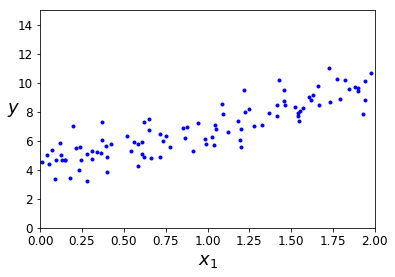

In [3]:
X = 2 * rnd.rand(100, 1)
y = 4 + 3 * X + rnd.randn(100, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [4]:
# Example of computing the Normal Equation
import numpy.linalg as LA

X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = LA.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[ 4.21509616],
       [ 2.77011339]])

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.21509616],
       [ 9.75532293]])

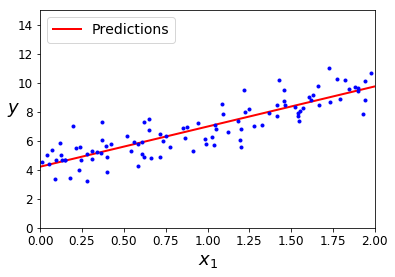

In [6]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

# Computational Complexity

The complexity of the Normal Equation is due to the need to calculate the inverse of an $n \times n$ matrix. The complexity thus ranges from $O(n^{2.4})$ to $O(n^3)$.

# Gradient Descent

Takes small iterative steps to find a global minimum of the cost function. Careful not set your learning parameter to high (big jumps) or too low (small jumps). Make sure to use feature scaling when using GD.

# Batch Gradient Descent

Partial with respect to one parameter: $\frac{\partial}{\partial \theta_j} MSE(\theta) = \frac{2}{m} \Sigma_{i = 1}^{m} (\theta^T \cdot x^{(i)} - y^{(i)})x^{(i)}_j$. Doing this every iteration when the number of training examples is high is incredibly slow! Once you have the partial derivative you can use: $\theta^{next} = \theta - \alpha \nabla_{\theta}MSE(\theta)$

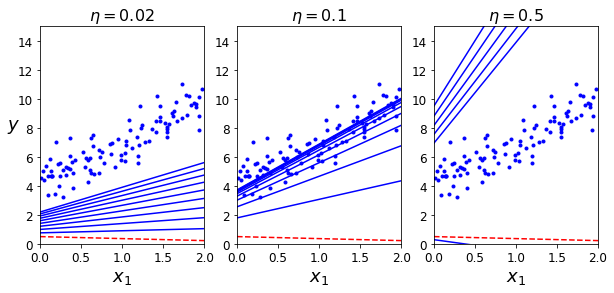

In [7]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

rnd.seed(42)
theta = rnd.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
plt.show()

The graphs above are the perfect example of setting the learning rate too low, just right, and too high respectively.

# Stochastic Gradient Descent

Whereas Batch Gradient Descent (BGD) uses the entire training set to compute the gradient, Stochasitc Gradient Descent (SGD) uses only one random training example. 

*Simulated Annealing*: reducing the learning rate in a SGD model in order to reduce the hop size when the model gets close to the true minimum. The *Learning Schedule* is the function which determines the change in learning rate.

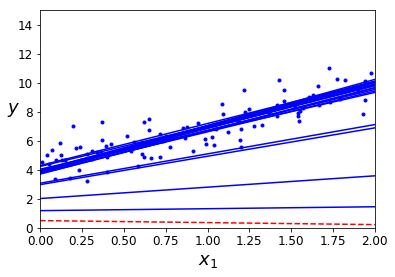

In [8]:
theta_path_sgd = []

n_iterations = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

rnd.seed(42)
theta = rnd.randn(2,1)  # random initialization

def learning_schedule(t):
    return t0 / (t + t1)

m = len(X_b)

for epoch in range(n_iterations):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        random_index = rnd.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [9]:
""" Instead of training the model by hand, like above, Scikit-learn has a built
    in function that will perfrom BGD for you """
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([ 4.23166744]), array([ 2.79099659]))

# Minibatch Gradient Descent 

In Minibatch Gradient Descent, you compute the gradient on a small random subset of the training set rather than on its entirety or a random instance.

In [10]:
""" Minibatch training """
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

rnd.seed(42)
theta = rnd.randn(2,1)  # random initialization

t0, t1 = 10, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = rnd.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [11]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

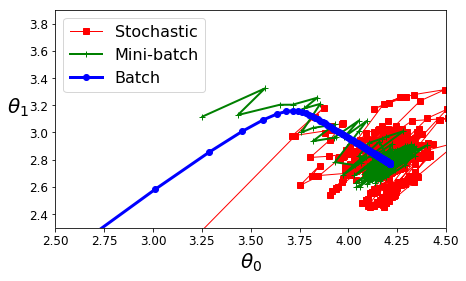

In [12]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

# Polynomial Regression

With **Polynomail Regression** you can fit linear models to non-linear data by adding powers of the features to your model as new features. 

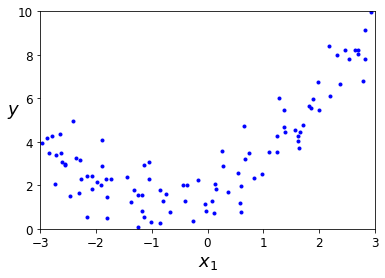

In [13]:
# Generates random data that resembles the quadratic equation and plots it

import numpy as np
import numpy.random as rnd

rnd.seed(42)
m = 100
X = 6 * rnd.rand(m, 1) - 3     # rnd.random(m,n) generates a random m by n matrix 
y = 2 + X + 0.5 * X**2 + rnd.randn(m, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [14]:
# Use scikit-learn's PolynomialFeatures class in order to train our linear model to fit 
# non-linear data 
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [15]:
# X_poly contains all orginial features plus their squares. Now we can use it to train a linear
# model using Scikit-learn's LinearRegression feature
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 1.78134581]), array([[ 0.93366893,  0.56456263]]))

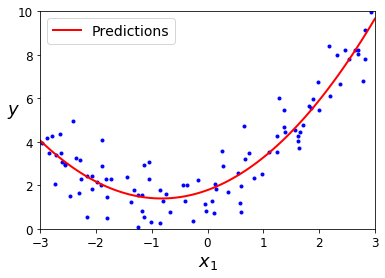

In [16]:
# Let's see our model in action with Matplotlib
X_new = np.linspace(-3, 3, 100).reshape(100, 1)     # linspace - returns evenly spaced numbers over a specified interval
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

**BEWARE**: A call to PolynomialFeatures with $degree = d$ transforms an array containing $n$ features into an array containing $\frac{(n + d)!}{d!n!}$ features. 

# Learning Curves

A rough metric for deciding if a model is over or under fitting data. If it's **overfitting** then your model's performance is great on the training data put poor on the test data. If it's **underfitting** then your model's performance is most likely poor on both sets.

A model's performance can be measured by its **learning curve**. These curves are plots of the model's performance on the training set and validation set as a function of training set size. 

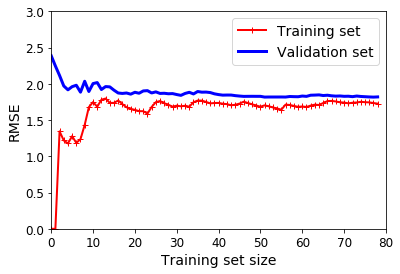

In [17]:
# Learning curve for a linear regression model  

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Training set")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

Our model is underfitting the data as the curves are both close and near a high plateau. Thus we must generate better features or choose a more complex model. 

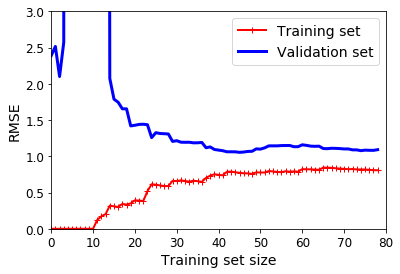

In [18]:
# The following generates a 10-th degree polynomial. This model will most likely over-fit the data as the underlying 
# curve is quadratic with a bit of noise 

from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("sgd_reg", LinearRegression()),
    ))

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

Differences between this curve and the other pervious curve: 
1. Training data error is lower
2. There is a gap between the curves which means the model performs much better on the training set than on the validation set.  

Improve overfitting models by providing more data so that the validation error and the training errors meet. 

# Ridge Regression

In **Ridge Regression** (a.k.a. **Tikhonov Regularization**) is a regularized version of Linear Regression wherein a regularization term equal to $\alpha \Sigma_{i=1}^{n} \theta_i^2$ is added to the cost function. This term helps keep the weight of each relatively low. This term is only added during training and is thus removed when validating the model.

The cost function using ridge regression is $J(\theta) = MSE(\theta) + \frac{\alpha}{2} \Sigma_{i=1}^{n} \theta_i^2$. Note, it is important that you scale the data before applying Ridge Regression.

In [19]:
# Application of RR using Stochasitic GD. To make SGD use the RR term, use the penalty parameter.
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty="l2", random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([ 3.82062962])

# Lasso Regression

**Least Absolute Shrinkage and Selection Operator (Lasso) Regression** uses the $l_1$ norm of the weight vector: $J(\theta) = MSE(\theta) + \alpha \Sigma_{i=1}^{n} |\theta_i|$. Characteristics:
1. Tends to completely eliminate the weights of unimportant features. 
2. Automatically performs feature selection and outputs sparse model.

In [20]:
# Example of an application of Lasso Regression. Note: you can also just use 
# SGDRegressor(penalty='l1') instead
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([ 4.77621741])

# Elastic Net

**Elastic Net** is simply a mixture of both Ridge and Lasso Regression controlled by a mixture parameter $r$. The cost function is given by: $J(\theta) = MSE(\theta) + \alpha \, (r \, \Sigma_{i=1}^{n} |\theta_i| + \frac{1-r}{2} \, \Sigma_{i=1}^{n}\theta_i^2)$

By default, you should at least you Ridge Regression. If you suspect some features are uninmportant, use Elastic or Lasso. Elastic is usually better than Lasso though as pure Lasso behaves erratically the number of features is greater than training examples or when some features are strongly correlated. 

In [21]:
# Example of Elastic Net from Scikit-learn 
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([ 4.78114505])

# Early Stopping 

**Early Stopping** is a regularization scheme in which the features are regularized by stoping the algorithm once the validation error reaches some minimum. 

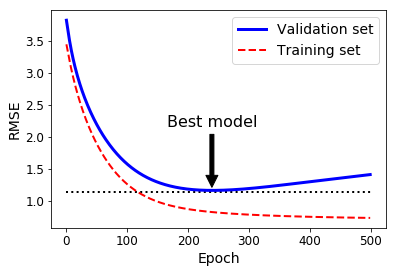

In [23]:
from sklearn.preprocessing import StandardScaler

rnd.seed(42)
m = 100
X = 6 * rnd.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + rnd.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline((
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ))

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(n_iter=1,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train_predict, y_train))
    val_errors.append(mean_squared_error(y_val_predict, y_val))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

Use Early Stopping to select the model with the error inidicated by the black arrow. The validation error begins to rise due to the model overfitting the data.

In [25]:
# Basic example of early stopping 

from sklearn.base import clone

sgd_reg = SGDRegressor(n_iter=1, warm_start=True, penalty=None,
                       learning_rate="constant", eta0=0.0005, random_state=42) # Warm start set to True makes the fit() method
                                                                               # start off where it left off rather than starting
                                                                               # over anew 
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)
best_epoch, best_model

(239, SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
        fit_intercept=True, l1_ratio=0.15, learning_rate=u'constant',
        loss='squared_loss', n_iter=1, penalty=None, power_t=0.25,
        random_state=42, shuffle=True, verbose=0, warm_start=True))

# Logistic Regression

**Logistic Regression** is used to estimate the probability that a particular instance belongs to some class. 

## Estimating Probabilities

Logistic Regression model estimated probability (vectorized): $\hat{p} = h_\theta(\vec{x}) = \sigma \,\,(\theta^T \cdot \vec{x})$ where $\sigma$ is the sigmoid function. Sigmoid function: $\sigma(t) = \frac{1}{1 + e^{-t}}$. Logistic Regression predicts 1 if $\theta^T \cdot \vec{x}$ is positive and 0 if its negative.

## Training and Cost Function

For a single instance $\vec{x}$, the cost function is $- log(\hat{p})$ if $y = 1$ and  $- log(1- \hat{p})$ if $y = 0$. The cost function for the entire set is: $J(\theta) = - \frac{1}{m} \Sigma_{i=1}^{m} [y^{(i)}log(\hat{p}^{(i)}) + ( 1 - y^{(i)}) log(1 - \hat{p}^{(i)} )]$. There is no closed form solution for this equation. The partial derivative of the cost function is given by: $\frac{\partial{}}{\partial{\theta_j}} J(\theta) = \frac{1}{m} \Sigma_{i=1}^{m} (\sigma(\theta^T \cdot \vec{x}^{(i)}) - y^{(i)})\,\,x_j^{(i)}$

## Decision Boundaries

In [27]:
# Let's import the Iris dataset in order to learn about Logistic Regression

from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [28]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [31]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0

In [32]:
# Train logistic regression model 
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

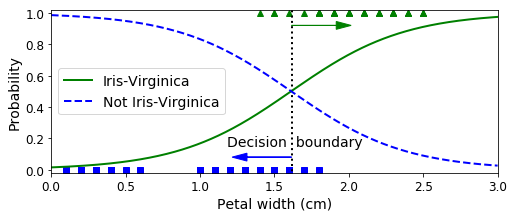

In [35]:
# Estimated probabilities for flowers with pedal widths from 0 to 3 cm 
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

## Softmax Regression

**Softmax Regression** is the multiclass generalization of Logistic Regression. With Softmax Regression you only need to train one model rather than a set of binary models. 

Softmax model first computes the score $s_k(\vec{x}) = \theta^T_k \cdot \vec{x}$ of an instance for each class $k$ and then returns the probability using the **softmax function**. The softmax function is given by: $\hat{p} = \sigma(\,s(\vec{x})\,)_k = \frac{exp(s_k(\vec{x}))}{\Sigma_{j=1}^{K}exp(s_j(\vec{x}))}$ where $K$ is the number of classes, $s(\vec{x})$ is a vector containing the scores for each class for the instance $\vec{x}$, and $\sigma(\,s(\vec{x})\,)_k$ is the estimated probability that the instance $\vec{x}$ belongs to class $k$. 

Softmax regression predicts the class with the highest estimated probability

Cross enthropy cost function: $J(\Theta) = - \frac{1}{m} \Sigma_{i=1}^{m} \Sigma_{k=1}^{K} y_{k}^{(i)} log (\hat{p}_{k}^{(i)})$. Penalizes model when it estimates low probabilities for target class. Gradient vector of cross enthropy for class $k$: $\nabla_{\theta_k} J(\Theta) = \frac{1}{m} \Sigma_{i=1}^{m} (\hat{p}_{k}^{(i)} - i_{k}^{(i)})$

In [36]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class=u'multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver=u'lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

# Exercises

#### Q1: What Linear Regression training algorithm can you have a training set with millions of features?